In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
sc.settings.set_figure_params(dpi=100)

In [2]:
# read in the levenshtein distance for the epitope information
df_l = pd.read_csv('../outputs/model_v3/full.epitope.levenshtein.csv', index_col=0)

[Text(0.5, 0, 'Levenshtein Distance'), Text(0, 0.5, '%')]

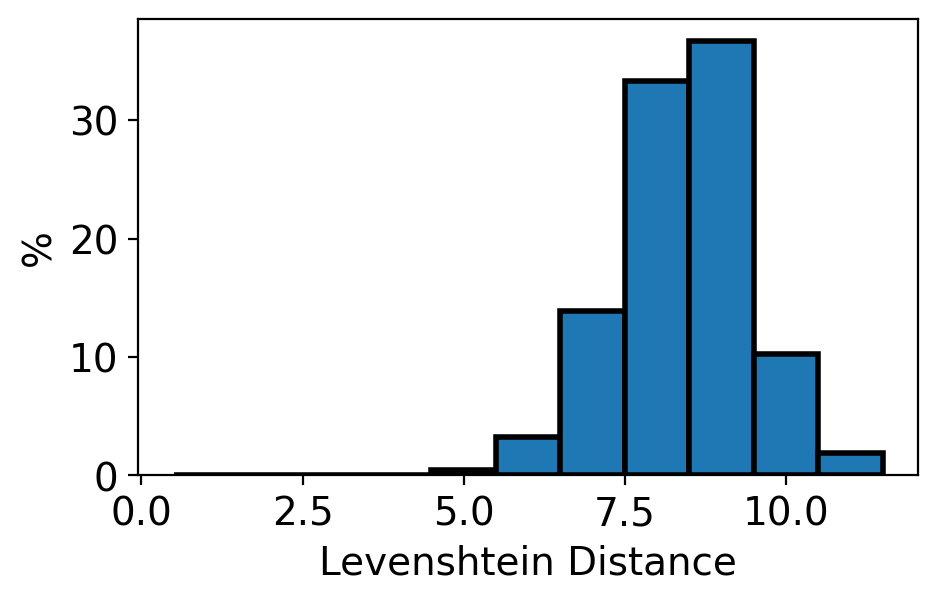

In [5]:
# check the levenshtein distance
fig, ax = plt.subplots(figsize=[5, 3])
ax.grid(False)
bars = pd.Series(df_l.values.flatten()[df_l.values.flatten() > 0]).value_counts()
bars /= bars.sum() * 0.01
order = sorted(bars.index)
ax.bar(order, bars.loc[order], linewidth=2, edgecolor='k', width=1)
ax.set(xlabel='Levenshtein Distance', ylabel='%')

In [4]:
# read in the values
cdr3_to_X = pd.read_csv('../outputs/model_v3/cdr3.conversion.n30.csv', index_col=0)
ag_to_X = pd.read_csv('../outputs/model_v3/epitope.conversion.n15.csv', index_col=0)

In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_curve, auc, accuracy_score
from tqdm import tqdm

%load_ext tensorboard

2024-01-03 14:26:47.077484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-03 14:26:47.230740: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 14:26:47.981600: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-03 14:26:47.981703: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

100%|███████████████████████████████████████| 1576/1576 [00:47<00:00, 33.22it/s]


127014 20030


2023-12-29 14:58:20.964857: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-12-29 14:58:20.964964: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-12-29 14:58:20.993175: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
2977/2977 [==============================] - 15s 5ms/step - loss: 0.3322 - accuracy: 0.8633 - auc: 0.9242 - val_loss: 0.2888 - val_accuracy: 0.8849 - val_auc: 0.9460
Epoch 2/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.2665 - accuracy: 0.8920 - auc: 0.9513 - val_loss: 0.2563 - val_accuracy: 0.8986 - val_auc: 0.9545
Epoch 3/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.2319 - accuracy: 0.9093 - auc: 0.9618 - val_loss: 0.2348 - val_accuracy: 0.9100 - val_auc: 0.9600
Epoch 4/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.1934 - accuracy: 0.9262 - auc: 0.9724 - val_loss: 0.2076 - val_accuracy: 0.9252 - val_auc: 0.9671
Epoch 5/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.1566 - accuracy: 0.9412 - auc: 0.9815 - val_loss: 0.1907 - val_accuracy: 0.9327 - val_auc: 0.9721
Epoch 6/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.1256 - accuracy: 0.9534 - auc: 0.988

Epoch 6/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.1303 - accuracy: 0.9520 - auc: 0.9869 - val_loss: 0.1903 - val_accuracy: 0.9341 - val_auc: 0.9733
Epoch 7/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.1052 - accuracy: 0.9603 - auc: 0.9918 - val_loss: 0.1786 - val_accuracy: 0.9402 - val_auc: 0.9774
Epoch 8/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.0818 - accuracy: 0.9696 - auc: 0.9952 - val_loss: 0.1769 - val_accuracy: 0.9434 - val_auc: 0.9783
Epoch 9/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.0629 - accuracy: 0.9778 - auc: 0.9972 - val_loss: 0.1746 - val_accuracy: 0.9481 - val_auc: 0.9802
Epoch 10/10
3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 14s 5ms/step - loss: 0.3347 - accuracy: 0.8615 - auc: 0.9225 - val_loss: 0.2841 - val_accuracy: 0.8861 - val_auc: 0.9456
Epoch 2/10
2977/2977 [========================

3970/3970 [==============================] - 9s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 14s 5ms/step - loss: 0.3369 - accuracy: 0.8602 - auc: 0.9217 - val_loss: 0.2867 - val_accuracy: 0.8863 - val_auc: 0.9453
Epoch 2/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.2689 - accuracy: 0.8921 - auc: 0.9501 - val_loss: 0.2597 - val_accuracy: 0.8986 - val_auc: 0.9529
Epoch 3/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.2343 - accuracy: 0.9082 - auc: 0.9608 - val_loss: 0.2373 - val_accuracy: 0.9093 - val_auc: 0.9592
Epoch 4/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.1984 - accuracy: 0.9245 - auc: 0.9709 - val_loss: 0.2143 - val_accuracy: 0.9217 - val_auc: 0.9659
Epoch 5/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.1626 - accuracy: 0.9393 - auc: 0.9803 - val_loss: 0.1993 - val_accuracy: 0.9288 - val_auc: 0.9705
Epoch 6/10
2977/2977 [==============================] - 12

100%|███████████████████████████████████████| 1576/1576 [00:58<00:00, 26.73it/s]


127014 83261
Epoch 1/10
2977/2977 [==============================] - 14s 4ms/step - loss: 0.4938 - accuracy: 0.7391 - auc: 0.8315 - val_loss: 0.4387 - val_accuracy: 0.7720 - val_auc: 0.8696
Epoch 2/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.4236 - accuracy: 0.7809 - auc: 0.8788 - val_loss: 0.4154 - val_accuracy: 0.7874 - val_auc: 0.8844
Epoch 3/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.3891 - accuracy: 0.8016 - auc: 0.8992 - val_loss: 0.3973 - val_accuracy: 0.7998 - val_auc: 0.8977
Epoch 4/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.3498 - accuracy: 0.8251 - auc: 0.9202 - val_loss: 0.3785 - val_accuracy: 0.8141 - val_auc: 0.9096
Epoch 5/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.3051 - accuracy: 0.8513 - auc: 0.9407 - val_loss: 0.3613 - val_accuracy: 0.8316 - val_auc: 0.9209
Epoch 6/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.2626 - accuracy: 0.8756

Epoch 6/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.2565 - accuracy: 0.8811 - auc: 0.9595 - val_loss: 0.3729 - val_accuracy: 0.8327 - val_auc: 0.9206
Epoch 7/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.2193 - accuracy: 0.9017 - auc: 0.9709 - val_loss: 0.3816 - val_accuracy: 0.8414 - val_auc: 0.9249
Epoch 8/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.1889 - accuracy: 0.9174 - auc: 0.9787 - val_loss: 0.3905 - val_accuracy: 0.8484 - val_auc: 0.9272
Epoch 9/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.1611 - accuracy: 0.9321 - auc: 0.9847 - val_loss: 0.3957 - val_accuracy: 0.8491 - val_auc: 0.9284
Epoch 10/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.1385 - accuracy: 0.9433 - auc: 0.9887 - val_loss: 0.4233 - val_accuracy: 0.8524 - val_auc: 0.9275


KeyboardInterrupt: 

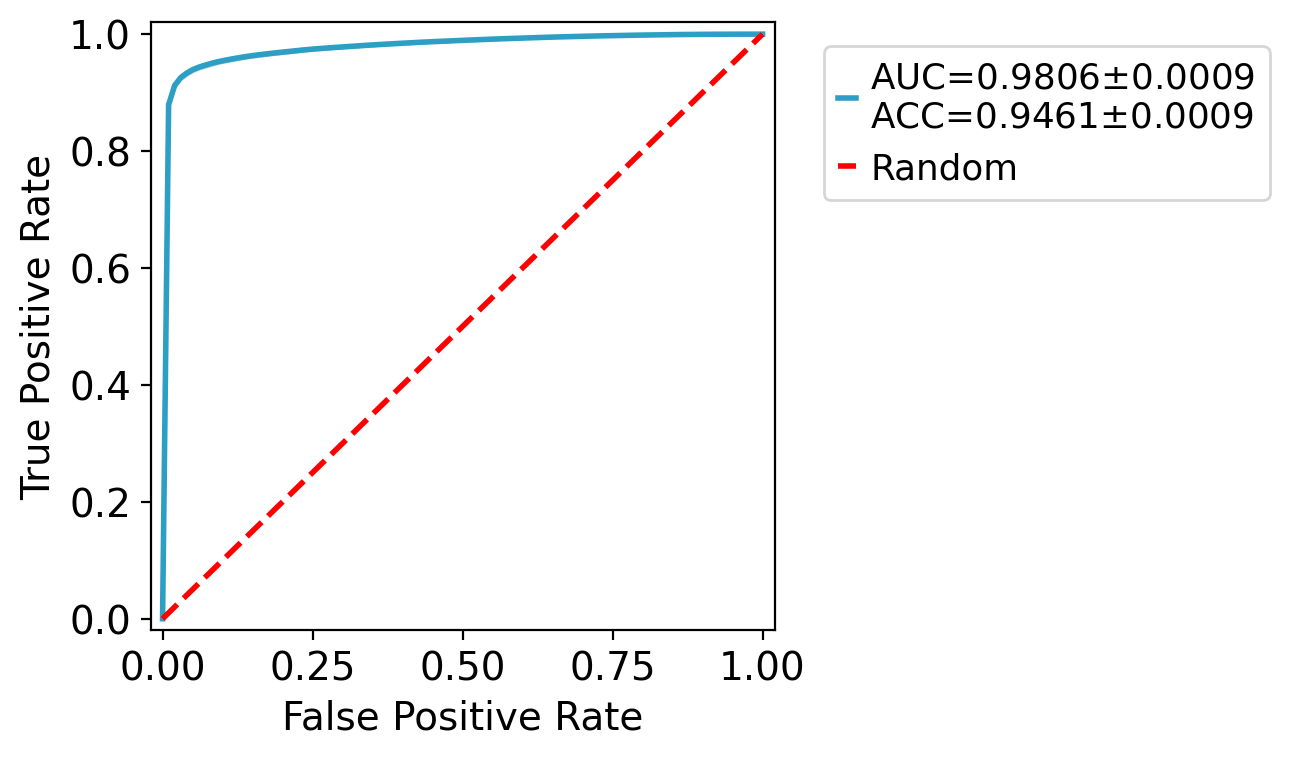

In [6]:
# check all possible levenshteins
vmax2stats = {}
for vmax in range(5, 12):
    # set seed and identify irrelevant matches
    np.random.seed(0)
    irrs = []

    # read in the input peptide information
    df = pd.read_csv('../outputs/model_v3/full.input.X.csv', index_col=0)
    counts = df['Epitope'].value_counts()

    for pep in tqdm(df_l.index):
        # gather peptide cdr3 information
        n_cdr3s = counts.loc[pep]
        pep_cdr3s = df.loc[df['Epitope'] == pep, 'CDR3'].unique()
        # we first grab the peptide levenshtein distances
        pep_levenshtein = df_l[pep].sort_values()[::-1]
        # systematically identify negative controls
        irr_cdr3s = []
        # then we look at the max distance, gather those peptides, randomly choose one
        # find associated CDR3s that don't overlap with the current peptide
        irr_peps = pep_levenshtein.index[pep_levenshtein == vmax]
        # find the irrelevant peptide CDR3s and make sure they don't overlap
        mask = (df['Epitope'].isin(irr_peps)) & (~df['CDR3'].isin(pep_cdr3s))
        if sum(mask) == 0: continue
        # if we have cdr3s then grab them out
        cdr3s = df.loc[mask, 'CDR3']
        # if there are more than we need randomly select
        if len(cdr3s) > n_cdr3s:
            irr_cdr3s = np.random.choice(cdr3s, size=n_cdr3s, replace=False).tolist()
        # otherwise add them all
        else: irr_cdr3s = cdr3s.tolist()
        # compile the full list
        irr = pd.DataFrame(irr_cdr3s, columns=['CDR3'])
        irr['Epitope'] = pep
        irrs.append(irr)

    # we'll read both of these values and the original input and irrelevant tcrs
    hit = df.copy()
    irr = pd.concat(irrs, axis=0).reset_index().iloc[:, 1:]
    print(hit.shape[0], irr.shape[0])
    # now up sample it accordingly
    if irr.shape[0] < hit.shape[0]:
        idxs = np.random.choice(irr.index, size=hit.shape[0], replace=True)
        irr = irr.loc[idxs].reset_index().iloc[:, 1:]

    # retrieve values and aucs
    fprs, tprs, aucs, accs = [], [], [], []

    # complete 10 iterations
    for seed in range(10):
        ## SETUP CONSTANTS
        # grab a subset
        np.random.seed(seed)
        n_rows = hit.shape[0] // 2
        perc_train = 0.75


        ## SEPARATE OUT TRAINING AND TESTING
        # train and test
        # > subset target
        idxs = np.random.choice(hit.index, size=n_rows, replace=False)
        idxs, idys = idxs[:round(n_rows * perc_train)], idxs[round(n_rows * perc_train):]
        hit_train, hit_test = hit.loc[idxs], hit.loc[idys]
        # > subset control
        idxs = np.random.choice(irr.index, size=n_rows, replace=False)
        idxs, idys = idxs[:round(n_rows * perc_train)], idxs[round(n_rows * perc_train):]
        irr_train, irr_test = irr.loc[idxs], irr.loc[idys]
        # confirm no overlap
        assert not hit_train.index.isin(hit_test.index).all()
        assert not irr_train.index.isin(irr_test.index).all()

        # validation
        # > subset target
        val_idxs = hit.index[~hit.index.isin(hit_train.index.union(hit_test.index))]
        hit_val = hit.loc[val_idxs]
        # > subset control
        val_idxs = irr.index[~irr.index.isin(irr_train.index.union(irr_test.index))]
        irr_val = irr.loc[val_idxs]


        ## CONVERT TO CORRECT FORMAT
        # create X for training
        X_train = pd.concat([hit_train, irr_train], axis=0).reset_index().iloc[:, 1:]
        X_train_cdr3s = cdr3_to_X.loc[X_train['CDR3']].reset_index().iloc[:, 1:]
        X_train_epitopes = ag_to_X.loc[X_train['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_train_cdr3s.columns = 'cdr3:' + X_train_cdr3s.columns
        X_train_epitopes.columns = 'ag:' + X_train_epitopes.columns
        X_train = X_train_cdr3s.join(X_train_epitopes)

        # grab y for training
        y_train = pd.concat([pd.Series(np.ones(hit_train.shape[0])),
                             pd.Series(np.zeros(irr_train.shape[0]))], axis=0).astype(int)
        y_train = y_train.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_train.shape[0] == y_train.shape[0]

        # create X for testing
        X_test = pd.concat([hit_test, irr_test], axis=0).reset_index().iloc[:, 1:]
        X_test_cdr3s = cdr3_to_X.loc[X_test['CDR3']].reset_index().iloc[:, 1:]
        X_test_epitopes = ag_to_X.loc[X_test['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_test_cdr3s.columns = 'cdr3:' + X_test_cdr3s.columns
        X_test_epitopes.columns = 'ag:' + X_test_epitopes.columns
        X_test = X_test_cdr3s.join(X_test_epitopes)

        # grab y for testing
        y_test = pd.concat([pd.Series(np.ones(hit_test.shape[0])),
                             pd.Series(np.zeros(irr_test.shape[0]))], axis=0).astype(int)
        y_test = y_test.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_test.shape[0] == y_test.shape[0]

        # create X for validation
        X_val = pd.concat([hit_val, irr_val], axis=0).reset_index().iloc[:, 1:]
        X_val_cdr3s = cdr3_to_X.loc[X_val['CDR3']].reset_index().iloc[:, 1:]
        X_val_epitopes = ag_to_X.loc[X_val['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_val_cdr3s.columns = 'cdr3:' + X_val_cdr3s.columns
        X_val_epitopes.columns = 'ag:' + X_val_epitopes.columns
        X_val = X_val_cdr3s.join(X_val_epitopes)

        # grab y for validation
        y_val = pd.concat([pd.Series(np.ones(hit_val.shape[0])),
                             pd.Series(np.zeros(irr_val.shape[0]))], axis=0).astype(int)
        y_val = y_val.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_val.shape[0] == y_val.shape[0]

        # remove constant columns
        X_train = X_train.loc[:, X_train.nunique(0) > 1]
        X_train = X_train.loc[:, X_train.sum(0) > 0]
        # read in normalization factors
        means = X_train.mean(0)
        stds = (X_train - means).std(0)
        # subset for relevant columns
        X_train = X_train[means.index]
        X_test = X_test[means.index]
        X_val = X_val[means.index]
        # normalize
        X_train -= means
        X_train /= stds
        X_test -= means
        X_test /= stds
        X_val -= means
        X_val /= stds

        ## SETUP MODEL
        # retrieve the appropriate columns
        cols_cdr3 = X_val.columns[X_val.columns.str.startswith('cdr3')]
        cols_ag = X_val.columns[X_val.columns.str.startswith('ag')]

        # determine model parameters
        # > layer for cdr3 alone
        input_1 = keras.layers.Input(shape=(len(cols_cdr3)))
        output_1 = keras.layers.Dense(200, activation='sigmoid')(input_1)
        # > layer for ag alone
        input_2 = keras.layers.Input(shape=(len(cols_ag)))
        output_2 = keras.layers.Dense(100, activation='sigmoid')(input_2)
        # > combined layer
        concat_3 = keras.layers.Concatenate()([output_1, output_2])
        output_3 = keras.layers.Dense(100, activation='sigmoid')(concat_3)
        # > final logit softmax layer
        output_4 = keras.layers.Dense(1, activation='sigmoid')(output_3)
        model = keras.Model(inputs=[input_1, input_2], outputs=[output_4])
        # set up the training parameters for the model
        model.compile(
            optimizer=keras.optimizers.Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy','AUC'],
        )
        # train the model
        history = model.fit([X_train[cols_cdr3], X_train[cols_ag]], y_train,
                            epochs=10,
                            validation_data=([X_test[cols_cdr3], X_test[cols_ag]], y_test),
                            workers=40, use_multiprocessing=True)

        # testing predictions
        y_pred = model.predict([X_val[cols_cdr3], X_val[cols_ag]],
                               workers=40, use_multiprocessing=True)[:, 0]
        y_pred = pd.Series(y_pred, index=y_val.index, name='Pred%')
        y_pred = pd.concat([y_pred, y_val], axis=1)

        # retrieve auc metrics
        fpr, tpr, _ = roc_curve(y_pred[0], y_pred['Pred%'])
        fprs.append(fpr.tolist())
        tprs.append(tpr.tolist())
        aucs.append(auc(fpr, tpr))
        accs.append(accuracy_score(y_pred[0], y_pred['Pred%'].apply(round)))

    # create roc auc curve
    fig, ax = plt.subplots(figsize=[4, 4])
    ax.grid(False)
    # track values to compute mean value
    mean_tprs, mean_fpr = [], np.linspace(0, 1, 100)
    # plot the individual cv iterations
    for fpr, tpr in zip(fprs, tprs):
        # grab the true positive rate when we interpolate
        mean_tprs.append(np.interp(mean_fpr, fpr, tpr))
    #     # plot on this individual curve
    #     ax.plot(fpr, tpr, color='tab:blue', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
    # grab metrics for auc
    mean_auc = np.mean(aucs)
    ci95_auc = 1.96 * np.std(aucs) / np.sqrt(len(aucs))
    # grab metrics for acc
    mean_acc = np.mean(accs)
    ci95_acc = 1.96 * np.std(accs) / np.sqrt(len(accs))
    # plot the average iteration
    mean_tpr = np.mean(mean_tprs, axis=0)
    ax.plot(mean_fpr, mean_tpr, color='#2D9FC4', linewidth=2,
            label=r'AUC=%0.4f$\pm$%0.4f' % (mean_auc, ci95_auc) + '\n' +
            r'ACC=%0.4f$\pm$%0.4f' % (mean_acc, ci95_acc))
    # plot the standard errors (95% CI actually)
    ci95_tpr = 1.96 * np.std(mean_tprs, axis=0) / np.sqrt(len(mean_tprs))
    mean_tprs_upper = np.minimum(mean_tpr + ci95_tpr, 1)
    mean_tprs_lower = np.maximum(mean_tpr - ci95_tpr, 0)
    ax.fill_between(mean_fpr, mean_tprs_lower, mean_tprs_upper, color='#2D9FC4', alpha=0.50)
    # plot the random line
    ax.plot([0,1], [0,1], color='r', linewidth=2, linestyle='--', label='Random')
    # add on labels and adjust limits
    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.02, 1.02)
    ax.legend(bbox_to_anchor=(1.05,0.99), bbox_transform=ax.transAxes)
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    print(np.mean(aucs), np.std(aucs), np.mean(accs), np.std(accs))
    
    # store it up
    vmax2stats[vmax] = fprs, tprs, aucs, accs

In [ ]:
# save the data
import pickle as pkl
with open('tmp.pkl', 'wb') as f:
    pkl.dump(vmax2stats, f)

In [2]:
# pick up the work
import pickle as pkl
with open('tmp.pkl', 'rb') as f:
    vmax2stats = pkl.load(f)

5 0.9803746343509715 0.0008501674948702692 0.9462854488481585 0.0024967569193977564
6 0.9305783166664134 0.0009422712740293165 0.8506621317335096 0.0022507648415320573
7 0.8640159588011269 0.0010582054041216983 0.7763837057332262 0.0019004552544576337
8 0.8447482372185379 0.0018818534214226099 0.7528548034074983 0.002915492555907009
9 0.827869937989832 0.0033725926895855473 0.7340970286740045 0.003107010289717656
10 0.8938601087889246 0.0015111262108269917 0.8070094635237061 0.002051311615783809
11 0.9771138297790932 0.0016157343499424842 0.9257026784448958 0.004683585769147421


[Text(0.5, 0, 'False Positive Rate'), Text(0, 0.5, 'True Positive Rate')]

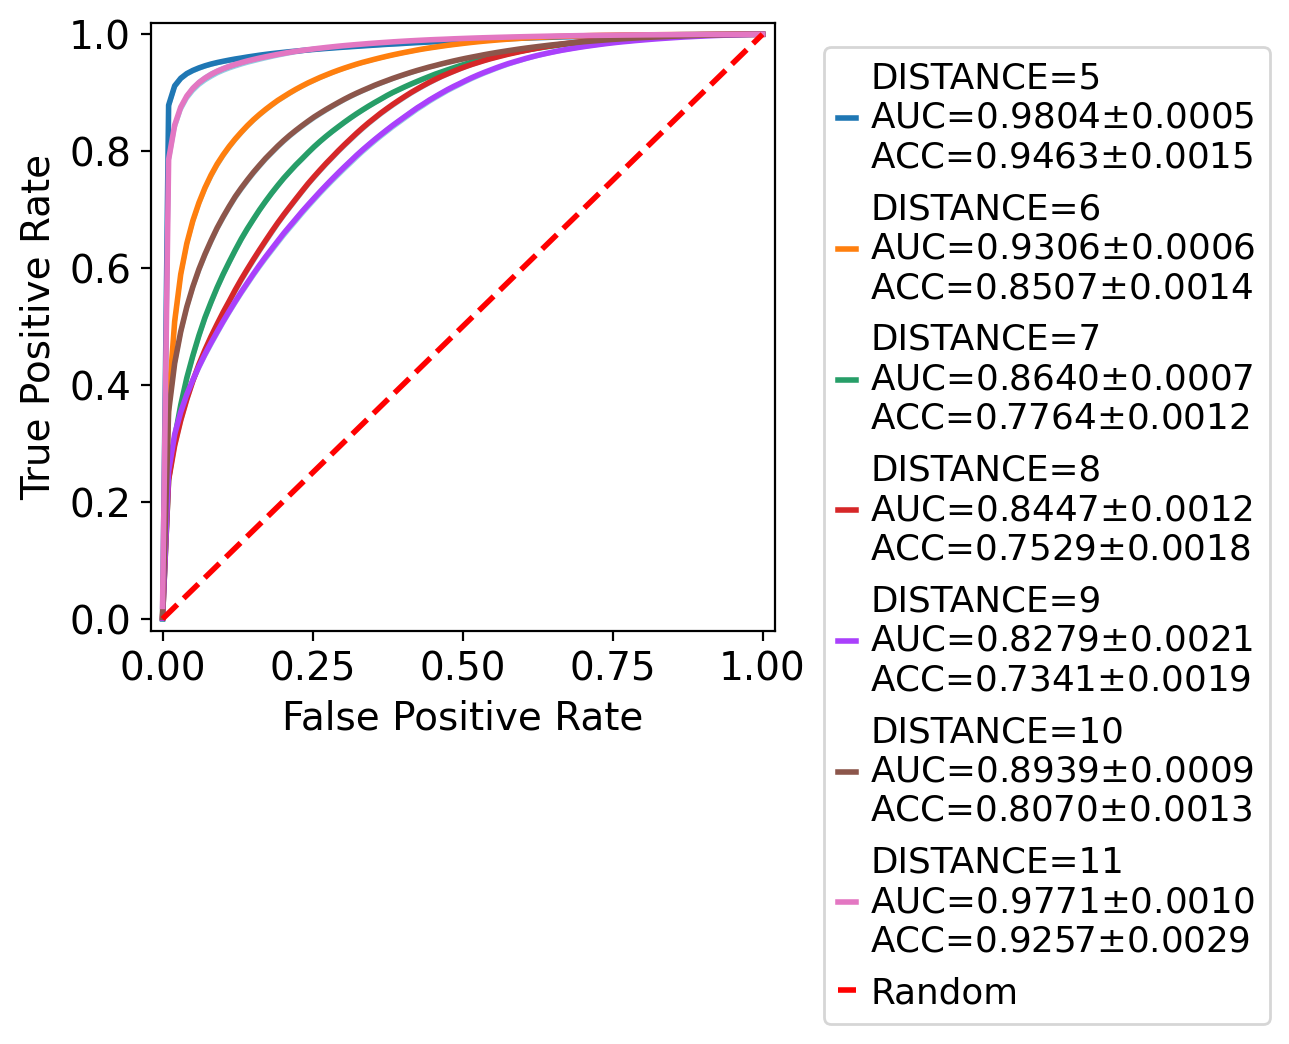

In [4]:
# create roc auc curve
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
for vmax in range(5, 12):
    # unpack the statistics
    fprs, tprs, aucs, accs = vmax2stats[vmax]
    # track values to compute mean value
    mean_tprs, mean_fpr = [], np.linspace(0, 1, 100)
    # plot the individual cv iterations
    for fpr, tpr in zip(fprs, tprs):
        # grab the true positive rate when we interpolate
        mean_tprs.append(np.interp(mean_fpr, fpr, tpr))
    #     # plot on this individual curve
    #     ax.plot(fpr, tpr, color='tab:blue', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
    # grab metrics for auc
    mean_auc = np.mean(aucs)
    ci95_auc = 1.96 * np.std(aucs) / np.sqrt(len(aucs))
    # grab metrics for acc
    mean_acc = np.mean(accs)
    ci95_acc = 1.96 * np.std(accs) / np.sqrt(len(accs))
    # plot the average iteration
    mean_tpr = np.mean(mean_tprs, axis=0)
    ax.plot(mean_fpr, mean_tpr, linewidth=2,
            label=f'DISTANCE={vmax}\n' + r'AUC=%0.4f$\pm$%0.4f' % (mean_auc, ci95_auc) + '\n' +
            r'ACC=%0.4f$\pm$%0.4f' % (mean_acc, ci95_acc))
    # plot the standard errors (95% CI actually)
    ci95_tpr = 1.96 * np.std(mean_tprs, axis=0) / np.sqrt(len(mean_tprs))
    mean_tprs_upper = np.minimum(mean_tpr + ci95_tpr, 1)
    mean_tprs_lower = np.maximum(mean_tpr - ci95_tpr, 0)
    ax.fill_between(mean_fpr, mean_tprs_lower, mean_tprs_upper, color='#2D9FC4', alpha=0.50)
    print(vmax, np.mean(aucs), np.std(aucs), np.mean(accs), np.std(accs))
# plot the random line
ax.plot([0,1], [0,1], color='r', linewidth=2, linestyle='--', label='Random')
# add on labels and adjust limits
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
ax.legend(bbox_to_anchor=(1.05,0.99), bbox_transform=ax.transAxes)
ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

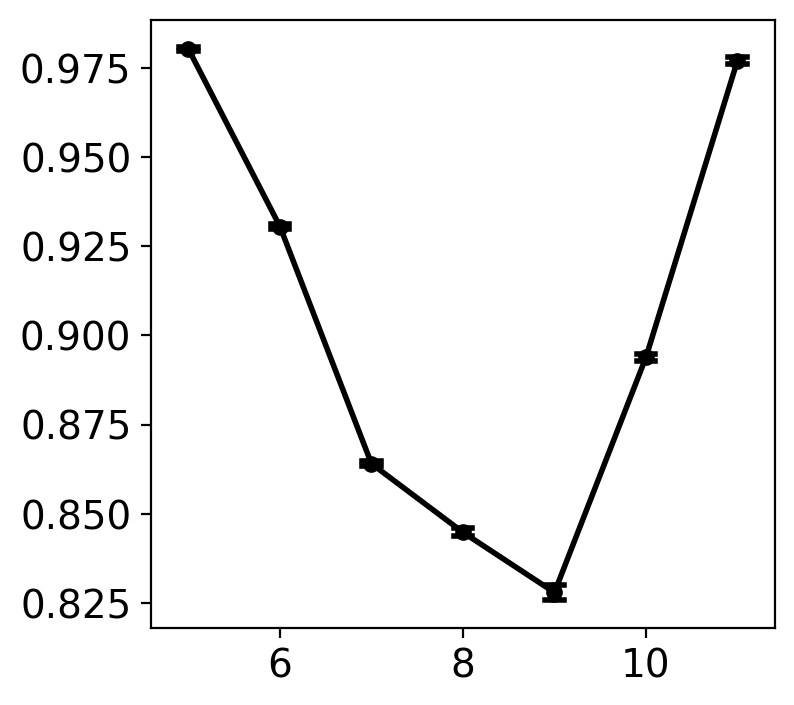

In [26]:
# get the values
xs = list(range(5, 12))
ys_mean = [np.mean(vmax2stats[x][2]) for x in xs]
ys_ci95 = [1.96 * np.std(vmax2stats[x][2]) / np.sqrt(len(vmax2stats[x][2])) for x in xs]
# create the plot
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
ax.scatter(xs, ys_mean, color='k', s=2.5e1)
ax.plot(xs, ys_mean, color='k', lw=2)
# now plot the ci95s
for idx, x in enumerate(xs):
    # retrieve the data
    mean, ci95 = ys_mean[idx], ys_ci95[idx]
    # now plot the ci95
    ax.plot([x]*2, [mean-ci95, mean+ci95], color='k', lw=2)
    ax.plot([x-0.1, x+0.1], [mean-ci95]*2, color='k', lw=2)
    ax.plot([x-0.1, x+0.1], [mean+ci95]*2, color='k', lw=2)